In [1]:
import pandas as pd
import numpy as np

import combined_app_data

In [2]:
combined_app_data_vader = pd.read_csv('combined_app_data_vader.csv')

In [3]:
combined_app_data_vader

,ID,CleanText,rating,source,sentiment_vader,num_characters,num_words,num_sentences
0,1,professional,5,ReviewData1,neutral,12,1,1
1,2,buggy far mostly customer support always late ...,1,ReviewData1,positive,88,13,1
2,3,great easy navigate use super easy,5,ReviewData1,positive,34,6,1
3,4,airbus use affordable years ago shock discover...,1,ReviewData1,negative,137,21,1
4,5,easy use great rates love meeting host super f...,5,ReviewData1,positive,76,13,1
...,...,...,...,...,...,...,...,...
177095,84689,try type venice search function crashes immedi...,1,ReviewData2,negative,56,8,1
177096,84692,clean room many facilities u ask towel soap mi...,5,ReviewData2,positive,327,55,1
177097,84693,good guide travels asia good choice hotels pic...,2,ReviewData2,positive,242,38,1
177098,84694,useful times use,4,ReviewData2,positive,16,3,1


In [4]:
combined_app_data_vader.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177100 entries, 0 to 177099
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ID               177100 non-null  int64 
 1   CleanText        177100 non-null  object
 2   rating           177100 non-null  int64 
 3   source           177100 non-null  object
 4   sentiment_vader  177100 non-null  object
 5   num_characters   177100 non-null  int64 
 6   num_words        177100 non-null  int64 
 7   num_sentences    177100 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 10.8+ MB


In [5]:
combined_app_data_vader.describe(include='all')

,ID,CleanText,rating,source,sentiment_vader,num_characters,num_words,num_sentences
count,177100.000000,177100,177100.000000,177100,177100,177100.000000,177100.000000,177100.0
unique,NaN,174153,NaN,2,3,NaN,NaN,NaN
top,NaN,professional,NaN,ReviewData1,positive,NaN,NaN,NaN
freq,NaN,2,NaN,115354,119669,NaN,NaN,NaN
mean,61386.353495,NaN,3.721293,NaN,NaN,66.788752,10.515223,1.0
std,41271.082010,NaN,1.684542,NaN,NaN,68.026488,10.548043,0.0
min,1.000000,NaN,1.000000,NaN,NaN,1.000000,1.000000,1.0
25%,26274.000000,NaN,2.000000,NaN,NaN,24.000000,4.000000,1.0
50%,55745.500000,NaN,5.000000,NaN,NaN,41.000000,7.000000,1.0
75%,90151.250000,NaN,5.000000,NaN,NaN,81.000000,13.000000,1.0


remove duplicate data

In [6]:
combined_app_data_vader1 = combined_app_data_vader.drop_duplicates(subset=['CleanText'])
combined_app_data_vader1 = combined_app_data_vader1.reset_index(drop=True)
combined_app_data_vader1

,ID,CleanText,rating,source,sentiment_vader,num_characters,num_words,num_sentences
0,1,professional,5,ReviewData1,neutral,12,1,1
1,2,buggy far mostly customer support always late ...,1,ReviewData1,positive,88,13,1
2,3,great easy navigate use super easy,5,ReviewData1,positive,34,6,1
3,4,airbus use affordable years ago shock discover...,1,ReviewData1,negative,137,21,1
4,5,easy use great rates love meeting host super f...,5,ReviewData1,positive,76,13,1
...,...,...,...,...,...,...,...,...
174148,84687,force closes overtime open please fix,1,ReviewData2,positive,37,6,1
174149,84689,try type venice search function crashes immedi...,1,ReviewData2,negative,56,8,1
174150,84692,clean room many facilities u ask towel soap mi...,5,ReviewData2,positive,327,55,1
174151,84693,good guide travels asia good choice hotels pic...,2,ReviewData2,positive,242,38,1


In [7]:
combined_app_data_vader1['sentiment_vader'].value_counts()

sentiment_vader
positive    117322
negative     32907
neutral      23924
Name: count, dtype: int64

Randomly sample 20,000 rows for each sentiment category to make the dataset balanced

In [8]:
positive_sample_CA = combined_app_data_vader1[combined_app_data_vader1['sentiment_vader'] == 'positive'].sample(n=20000, random_state=42)
negative_sample_CA = combined_app_data_vader1[combined_app_data_vader1['sentiment_vader'] == 'negative'].sample(n=20000, random_state=42)
neutral_sample_CA = combined_app_data_vader1[combined_app_data_vader1['sentiment_vader'] == 'neutral'].sample(n=20000, random_state=42)

Combine the sampled data into a single DataFrame

In [9]:
balanced_data_CA = pd.concat([positive_sample_CA, negative_sample_CA, neutral_sample_CA])

Shuffle the combined DataFrame

In [10]:
balanced_data_CA_vader = balanced_data_CA.sample(frac=1, random_state=42).reset_index(drop=True)
print(balanced_data_CA_vader['sentiment_vader'].value_counts())

sentiment_vader
positive    20000
negative    20000
neutral     20000
Name: count, dtype: int64


In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
balanced_data_CA_vader['sentiment_encoded'] = label_encoder.fit_transform(balanced_data_CA_vader['sentiment_vader'])
combined_app_data_vader['sentiment_encoded'] = label_encoder.fit_transform(combined_app_data_vader['sentiment_vader'])  

In [12]:
balanced_data_CA_vader

,ID,CleanText,rating,source,sentiment_vader,num_characters,num_words,num_sentences,sentiment_encoded
0,101658,reliable excellent choices convenient great pr...,5,ReviewData1,positive,67,8,1,2
1,35759,horrible experience support provide team book ...,1,ReviewData2,negative,157,25,1,0
2,124692,keeps freeze send error message try make reser...,3,ReviewData1,negative,70,11,1,0
3,112808,great great way travel stay amazing unexpected...,5,ReviewData1,positive,57,9,1,2
4,25536,okay recommend,4,ReviewData2,positive,14,2,1,2
...,...,...,...,...,...,...,...,...,...
59995,43643,sometimes messages take come,4,ReviewData1,neutral,28,4,1,1
59996,21632,single link connect human side even competitio...,1,ReviewData2,negative,218,38,1,0
59997,71935,make book travel easy user friendly great form...,5,ReviewData1,positive,130,21,1,2
59998,27378,cancel booking due covid situation get full re...,5,ReviewData2,positive,62,10,1,2


spliting data

In [13]:
from sklearn.model_selection import train_test_split

def data_split(data):
  X_train, X_test, y_train, y_test = train_test_split(data['CleanText'], data['sentiment_encoded'], test_size=0.2, random_state=42)
  return X_train, X_test, y_train, y_test

In [14]:
X_train_combinedData, X_test_combinedData, y_train_combinedData, y_test_combinedData = data_split(balanced_data_CA_vader)
print(f'Total data for training : {X_train_combinedData.nunique()}')
print(f'Total data for testing : {X_test_combinedData.nunique()}')
print(f"""Total sentiments counts for train data : 
     {y_train_combinedData.value_counts()}""")
print(f"""Total sentiments counts for test data : 
     {y_test_combinedData.value_counts()}""") 

Total data for training : 48000
Total data for testing : 12000
Total sentiments counts for train data : 
     sentiment_encoded
2    16042
0    15980
1    15978
Name: count, dtype: int64
Total sentiments counts for test data : 
     sentiment_encoded
1    4022
0    4020
2    3958
Name: count, dtype: int64


Used simple_preprocess library to tokenize texts because 'simple_preprocess' function from Gensim performs several filtering steps to clean the text, which includes removing words that do not meet certain criteria.

Steps and Criteria Used by simple_preprocess:
Lowercasing: Converts all characters to lowercase.
Removing Special Characters and Punctuation: Keeps only alphabetic characters and discards everything else.
Token Length: Removes words that are shorter than 2 characters or longer than 15 characters.

while 'nltk.word_tokenize' provides a more straightforward tokenization without additional filtering

In [15]:
from gensim.utils import simple_preprocess

def tokenize_text(data):
 text_tokens = [simple_preprocess(text) for text in data]
 return text_tokens

In [16]:
X_train_combinedData_tokens = tokenize_text(X_train_combinedData)
X_test_combinedData_tokens = tokenize_text(X_test_combinedData)
print(X_train_combinedData_tokens[0])
print(X_test_combinedData_tokens[0])

['seem', 'slow', 'access', 'new', 'messages']
['disappointed', 'service']


implementing woed2vec and TF-IDF Vectorizer for word embeddings

In [17]:
from gensim.models import Word2Vec

word2vec_model_vader = Word2Vec(sentences=X_train_combinedData_tokens, vector_size=100, window=4, min_count=5, workers=-1, sg=1, hs=0, negative=10, seed=34)
word2vec_model_vader.save("word2vec_model_vader.model")

In [18]:
loaded_model = Word2Vec.load("word2vec_model_vader.model")
vocabulary_combinedData = set(loaded_model.wv.key_to_index)

In [19]:
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vec = np.zeros((num_features,), dtype="float32")
    n_words = 0
    for word in words:
        if word in vocabulary:
            n_words += 1
            feature_vec = np.add(feature_vec, model[word])
    if n_words > 0:
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec

In [20]:
X_train_word2vec = np.array([average_word_vectors(tokens, word2vec_model_vader.wv, vocabulary_combinedData, word2vec_model_vader.vector_size) for tokens in X_train_combinedData_tokens])
X_test_word2vec = np.array([average_word_vectors(tokens, word2vec_model_vader.wv, vocabulary_combinedData, word2vec_model_vader.vector_size) for tokens in X_test_combinedData_tokens])

In [21]:
print(X_train_word2vec.shape)  
print(X_test_word2vec.shape) 

(48000, 100)
(12000, 100)


In [22]:
X_train_word2vec_df = pd.DataFrame(X_train_word2vec)
X_train_word2vec_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.002579,0.004584,0.001745,-0.003502,-0.001074,0.001376,-0.000835,-0.001994,0.007952,-0.002166,...,-0.005099,-0.000536,0.001886,0.000732,0.000223,0.000468,-0.003362,-0.002043,-0.001117,-0.002936
1,0.000304,-0.001388,0.001270,-0.001028,0.001097,-0.001988,0.000304,0.000387,0.000300,0.000778,...,-0.001826,-0.002295,0.002905,0.001507,-0.002895,-0.001904,0.000687,0.001544,-0.002137,-0.002003
2,-0.000256,-0.002861,-0.002663,0.000485,0.001674,0.000384,-0.005488,-0.002002,-0.002609,-0.000939,...,0.000664,0.000530,-0.000325,-0.003387,-0.001368,-0.002264,0.000406,0.001354,-0.002798,-0.000428
3,0.000605,-0.000422,0.001093,0.000384,-0.000063,-0.003158,0.000343,0.002041,0.001649,-0.001647,...,0.001646,-0.003081,0.000933,0.000136,0.002790,-0.000526,0.001342,0.000537,0.004943,-0.001207
4,0.008870,-0.004380,0.006430,-0.003864,-0.003096,-0.004425,0.003387,-0.001418,0.001004,-0.001240,...,0.000019,0.003008,0.000844,0.002297,-0.008193,-0.003953,-0.004860,0.001537,-0.000011,0.001894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47995,-0.002733,0.002404,0.003355,-0.002750,-0.002971,0.003086,-0.001296,0.000659,-0.003260,0.002970,...,0.002280,-0.000644,-0.001488,0.002847,0.002316,0.001725,0.000351,-0.001837,0.002749,-0.002498
47996,0.002200,-0.000876,0.000728,-0.001501,0.000407,-0.000545,0.000757,0.001060,0.001171,-0.000400,...,-0.000483,0.000435,0.001070,-0.000536,0.000311,-0.001085,-0.000585,-0.001269,0.000985,-0.000394
47997,-0.001628,0.001389,-0.000424,0.000037,-0.001493,0.001225,-0.000810,0.001591,-0.000017,-0.001498,...,0.001818,-0.000529,-0.000691,-0.001115,-0.000041,-0.000726,-0.001401,-0.000321,0.000685,-0.000192
47998,-0.000392,-0.001813,-0.003384,-0.001870,-0.000467,-0.002359,-0.000304,-0.002193,-0.000228,-0.000575,...,-0.001249,0.001208,0.002929,-0.005998,-0.004378,-0.002995,-0.000952,0.001664,-0.002989,-0.000100


In [25]:
all_tokens = sum(X_train_combinedData_tokens,[])
unique_tokens = len(set(all_tokens))
print(f"Total number of tokens: {len(all_tokens)}")
print(f"Total number of unique tokens: {unique_tokens}")

Total number of tokens: 539866
Total number of unique tokens: 16771


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer_vader = TfidfVectorizer(max_features=16771)  

X_train_tfidf = tfidf_vectorizer_vader.fit_transform(X_train_combinedData) 
X_test_tfidf = tfidf_vectorizer_vader.transform(X_test_combinedData)

In [24]:
print(X_train_tfidf[:5])
print(X_train_tfidf.toarray())

  (0, 9366)	0.4515631924695303
  (0, 9992)	0.3987056760881313
  (0, 107)	0.46337856669356037
  (0, 13704)	0.46178316528066704
  (0, 13207)	0.45734131592741745
  (1, 4225)	0.28468456263892555
  (1, 7123)	0.3482635149702948
  (1, 8686)	0.23917831172157356
  (1, 9923)	0.19288594463826708
  (1, 11421)	0.248736558195512
  (1, 14918)	0.2600999767951401
  (1, 15749)	0.2884969091077781
  (1, 6976)	0.21920750559366256
  (1, 8577)	0.26111421455418
  (1, 4451)	0.20598758040302684
  (1, 15037)	0.21253818384634984
  (1, 8937)	0.207555394571534
  (1, 8215)	0.3836013786488223
  (1, 7950)	0.2605479305711868
  (1, 6158)	0.1689769852859443
  (2, 6848)	0.2384026535694463
  (2, 1934)	0.19729803023319908
  (2, 16218)	0.3364260397281241
  (2, 16526)	0.33723818544827777
  (2, 2918)	0.5776280113728484
  (2, 9936)	0.4817539340848013
  (2, 8937)	0.3340428349430883
  (3, 576)	0.2476860201631613
  (3, 12556)	0.46274839253659394
  (3, 12370)	0.31270052742611487
  (3, 11297)	0.25303755415338014
  (3, 5589)	0.211864

making a random subset of 5000 data, to find the best hyperparameter for each model by using RandomizedSearchCV library on this subset data, as applying this on complete dataset at once can take many hours for models like SVC to figure out the best hyperparameter 

In [27]:
subset_data_combined_app = balanced_data_CA_vader.sample(n=5000, random_state=42).copy()

In [28]:
subset_data_combined_app 

,ID,CleanText,rating,source,sentiment_vader,sentiment_encoded
12628,36929,disappointed service,1,ReviewData2,negative,0
37730,50959,try application holiday,5,ReviewData2,positive,2
39991,28318,terrible provide photos tell host reason trip ...,1,ReviewData1,negative,0
8525,23365,absolutely brilliant experience far,5,ReviewData1,positive,2
8279,91759,easy use great host guests,5,ReviewData1,positive,2
...,...,...,...,...,...,...
13371,140082,husband see home housekeeper see search show w...,3,ReviewData1,neutral,1
16875,14839,smooth book experience,5,ReviewData1,neutral,1
11400,141818,dont think oh login whats,1,ReviewData1,neutral,1
39680,52977,wonderful experience make trips much affordabl...,5,ReviewData1,positive,2


In [29]:
subset_combinedData_tokens = tokenize_text(subset_data_combined_app ['CleanText'])

In [30]:
subset_combinedData_tokens[0]

['disappointed', 'service']

In [57]:
all_tokens1 = sum(subset_combinedData_tokens,[])
unique_tokens1 = len(set(all_tokens1))
print(f"Total number of tokens: {len(all_tokens1)}")
print(f"Total number of unique tokens: {unique_tokens1}")

Total number of tokens: 57237
Total number of unique tokens: 6075


In [31]:
subset_combinedData_word2vec = np.array([average_word_vectors(tokens, word2vec_model_vader.wv, vocabulary_combinedData, word2vec_model_vader.vector_size) for tokens in subset_combinedData_tokens])

In [32]:
subset_tfidf_vectorizer = TfidfVectorizer(max_features=6075)
subset_combinedData_tfidf= subset_tfidf_vectorizer.fit_transform(subset_data_combined_app['CleanText'])

In [77]:
#parameters in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 20)] #tree number
max_features = [1, 'sqrt','log2']
max_depth = [10,20,30,40]
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 2, 5, 10]

# Create the param grid
param_grid_forest = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(param_grid_forest)

{'n_estimators': [10, 14, 19, 24, 28, 33, 38, 43, 47, 52, 57, 62, 66, 71, 76, 81, 85, 90, 95, 100], 'max_features': [1, 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40], 'min_samples_split': [2, 5, 10, 15], 'min_samples_leaf': [1, 2, 5, 10]}


In [33]:
#parameter grid for XGBoost
param_grid_xgb = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
print(param_grid_xgb)

{'min_child_weight': [1, 5, 10], 'gamma': [0.5, 1, 1.5, 2, 5], 'subsample': [0.6, 0.8, 1.0], 'colsample_bytree': [0.6, 0.8, 1.0], 'max_depth': [3, 4, 5]}


In [61]:
#parameters in MNB
param_grid_nb = {
    'var_smoothing': [1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}
print(param_grid_nb)

{'var_smoothing': [1e-11, 1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05]}


In [62]:
#parameters in SVC
param_grid_svc = {'C': [1, 10, 100, 1000],
                  'kernel': ['linear','poly','rbf','sigmoid'],
                  'degree': [1,2,3,4]}
print(param_grid_svc)

{'C': [1, 10, 100, 1000], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [1, 2, 3, 4]}


In [63]:
#parameter in logistic regression
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear', 'saga'],  # 'saga' supports elasticnet but 'liblinear' does not
    'max_iter': [100, 200, 300]
}
print(param_grid_logreg)

{'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'solver': ['liblinear', 'saga'], 'max_iter': [100, 200, 300]}


In [2]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 435.7 kB/s eta 0:04:47
   ---------------------------------------- 0.0/124.9 MB 393.8 kB/s eta 0:05:18
   ---------------------------------------- 0.0/124.9 MB 393.8 kB/s eta 0:05:18
   ---------------------------------------- 0.1/124.9 MB 272.3 kB/s eta 0:07:39
   ---------------------------------------- 0.1/124.9 MB 532.5 kB/s eta 0:03:55
   ---------------------------------------- 0.2/124.9 MB 577.4 kB/s eta 0:03:37
   ---------------------------------------- 0.2/124.9 MB 513.4 kB/s eta 0:04:03
   ---------------------------------------- 0.2/124.9 MB 602.4 kB/s eta 0:03:27
   ---------------------------------------- 0.3/124.9 MB 655.5 kB/s eta 0:03:11
   ---------------------------------------- 0.4/124.9 MB 716.8 kB/s eta 0:02:54
   ---------------------------------------- 0.4/124.9 MB 7

In [25]:
from sklearn.ensemble._forest import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

model_forest = RandomForestClassifier()
model_gnb = GaussianNB()
model_mnb = MultinomialNB()
model_svc = SVC()
model_logreg = LogisticRegression()
model_xgb = XGBClassifier()

In [34]:
from sklearn.model_selection import RandomizedSearchCV
def tune_model_hyperparameters(embedding_model, y, model, param_grid):
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=7, verbose=1, n_jobs=-1)
    random_search.fit(embedding_model, y)
    return random_search.best_params_
y = subset_data_combined_app['sentiment_encoded']   

In [79]:
best_params_word2vec_rf = tune_model_hyperparameters(subset_combinedData_word2vec, y, model_forest, param_grid_forest)
best_params_tfidf_rf = tune_model_hyperparameters(subset_combinedData_tfidf, y, model_forest, param_grid_forest)

Fitting 7 folds for each of 10 candidates, totalling 70 fits
Fitting 7 folds for each of 10 candidates, totalling 70 fits


In [80]:
print(f'Best parameters for RandomForest with Word2Vec: {best_params_word2vec_rf}')
print(f'Best parameters for RandomForest with TF-IDF: {best_params_tfidf_rf}')

Best parameters for RandomForest with Word2Vec: {'n_estimators': 71, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20}
Best parameters for RandomForest with TF-IDF: {'n_estimators': 57, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}


In [36]:
best_params_word2vec_xgb = tune_model_hyperparameters(subset_combinedData_word2vec, y, model_xgb, param_grid_xgb)
best_params_tfidf_xgb = tune_model_hyperparameters(subset_combinedData_tfidf, y, model_xgb, param_grid_xgb)

Fitting 7 folds for each of 10 candidates, totalling 70 fits
Fitting 7 folds for each of 10 candidates, totalling 70 fits


In [37]:
print(f'Best parameters for XGBoost with Word2Vec: {best_params_word2vec_xgb}')
print(f'Best parameters for XGBoost with TF-IDF: {best_params_tfidf_xgb}')

Best parameters for XGBoost with Word2Vec: {'subsample': 1.0, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 0.5, 'colsample_bytree': 1.0}
Best parameters for XGBoost with TF-IDF: {'subsample': 1.0, 'min_child_weight': 1, 'max_depth': 4, 'gamma': 2, 'colsample_bytree': 0.8}


In [82]:
best_params_word2vec_nb = tune_model_hyperparameters(subset_combinedData_word2vec, y, model_gnb, param_grid_nb)
best_params_tfidf_nb = tune_model_hyperparameters(subset_combinedData_tfidf.toarray(), y, model_gnb, param_grid_nb)

C:\Users\anish\anaconda3\envs\gputest\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 7 folds for each of 7 candidates, totalling 49 fits


C:\Users\anish\anaconda3\envs\gputest\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 7 folds for each of 7 candidates, totalling 49 fits


In [83]:
print(f'Best parameters for NaiveBayes with Word2Vec: {best_params_word2vec_nb}')
print(f'Best parameters for NaiveBayes with TF-IDF: {best_params_tfidf_nb}')

Best parameters for NaiveBayes with Word2Vec: {'var_smoothing': 1e-11}
Best parameters for NaiveBayes with TF-IDF: {'var_smoothing': 1e-05}


In [84]:
best_params_word2vec_logreg = tune_model_hyperparameters(subset_combinedData_word2vec, y, model_logreg, param_grid_logreg)
best_params_tfidf_logreg = tune_model_hyperparameters(subset_combinedData_tfidf, y, model_logreg, param_grid_logreg)    

Fitting 7 folds for each of 10 candidates, totalling 70 fits


C:\Users\anish\anaconda3\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
42 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\anish\anaconda3\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\anish\anaconda3\envs\gputest\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\anish\anaconda3\envs\gputest\lib\site-packages\sklearn\linear_model\_logistic.py", line 1179, in fit
    raise Va

Fitting 7 folds for each of 10 candidates, totalling 70 fits


C:\Users\anish\anaconda3\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
21 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\anish\anaconda3\envs\gputest\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\anish\anaconda3\envs\gputest\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\anish\anaconda3\envs\gputest\lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    solver =

In [85]:
print(f'Best parameters for LogReg with Word2Vec: {best_params_word2vec_logreg}')
print(f'Best parameters for LogReg with TF-IDF: {best_params_tfidf_logreg}')

Best parameters for LogReg with Word2Vec: {'solver': 'saga', 'penalty': 'none', 'max_iter': 300, 'C': 10}
Best parameters for LogReg with TF-IDF: {'solver': 'saga', 'penalty': 'l2', 'max_iter': 300, 'C': 10}


In [86]:
best_params_word2vec_SVC = tune_model_hyperparameters(subset_combinedData_word2vec, y, model_svc, param_grid_svc)
best_params_tfidf_SVC = tune_model_hyperparameters(subset_combinedData_tfidf, y, model_svc, param_grid_svc)   

Fitting 7 folds for each of 10 candidates, totalling 70 fits
Fitting 7 folds for each of 10 candidates, totalling 70 fits


In [87]:
print(f'Best parameters for SVC with Word2Vec: {best_params_word2vec_SVC}')
print(f'Best parameters for SVC with TF-IDF: {best_params_tfidf_SVC}')

Best parameters for SVC with Word2Vec: {'kernel': 'rbf', 'degree': 1, 'C': 1}
Best parameters for SVC with TF-IDF: {'kernel': 'linear', 'degree': 2, 'C': 1}


now applying the best hyperparameter figured out by RandomizedSearchCV on complete balanced dataset

In [26]:
print('Parameters for XGBoost with TF-IDF:')
Model1_xgb_vader_combinedData = XGBClassifier(subsample = 1.0, min_child_weight = 1, max_depth = 4, gamma = 2, colsample_bytree = 0.8)
Model1_xgb_vader_combinedData.fit(X_train_tfidf, y_train_combinedData)

Parameters for XGBoost with TF-IDF:


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [27]:
print('Parameters for XGBoost with Word2Vec:')
Model2_xgb_vader_combinedData = XGBClassifier(subsample = 1.0, min_child_weight = 5, max_depth = 5, gamma = 0.5, colsample_bytree = 1)
Model2_xgb_vader_combinedData.fit(X_train_word2vec, y_train_combinedData)

Parameters for XGBoost with Word2Vec:


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [28]:
from sklearn.metrics import classification_report, accuracy_score
y_pred_xgb_combinedData_tfidf = Model1_xgb_vader_combinedData.predict(X_test_tfidf)
accuracy_xgb_tfidf = accuracy_score(y_test_combinedData, y_pred_xgb_combinedData_tfidf)

In [29]:
y_pred_xgb_combinedData_word2vec = Model2_xgb_vader_combinedData.predict(X_test_word2vec)
accuracy_xgb_word2vec = accuracy_score(y_test_combinedData, y_pred_xgb_combinedData_word2vec)

In [30]:
print(f'Accuracy for XGBoost using TF-IDF in combined app data: {accuracy_xgb_tfidf*100}')
print(f'Accuracy for XGBoost using Word2Vec in combined app data: {accuracy_xgb_word2vec*100}')

Accuracy for XGBoost using TF-IDF in combined app data: 85.575
Accuracy for XGBoost using Word2Vec in combined app data: 73.13333333333333


In [31]:
print("Classification Report for XGBoost using TF-IDF:")
print(classification_report(y_test_combinedData, y_pred_xgb_combinedData_tfidf, target_names=label_encoder.classes_))
print("Classification Report for XGBoost using Word2Vec:")
print(classification_report(y_test_combinedData, y_pred_xgb_combinedData_word2vec, target_names=label_encoder.classes_))

Classification Report for XGBoost using TF-IDF:
              precision    recall  f1-score   support

    negative       0.86      0.81      0.83      4020
     neutral       0.79      0.94      0.86      4022
    positive       0.94      0.82      0.88      3958

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000

Classification Report for XGBoost using Word2Vec:
              precision    recall  f1-score   support

    negative       0.68      0.75      0.71      4020
     neutral       0.73      0.72      0.73      4022
    positive       0.80      0.72      0.76      3958

    accuracy                           0.73     12000
   macro avg       0.74      0.73      0.73     12000
weighted avg       0.74      0.73      0.73     12000



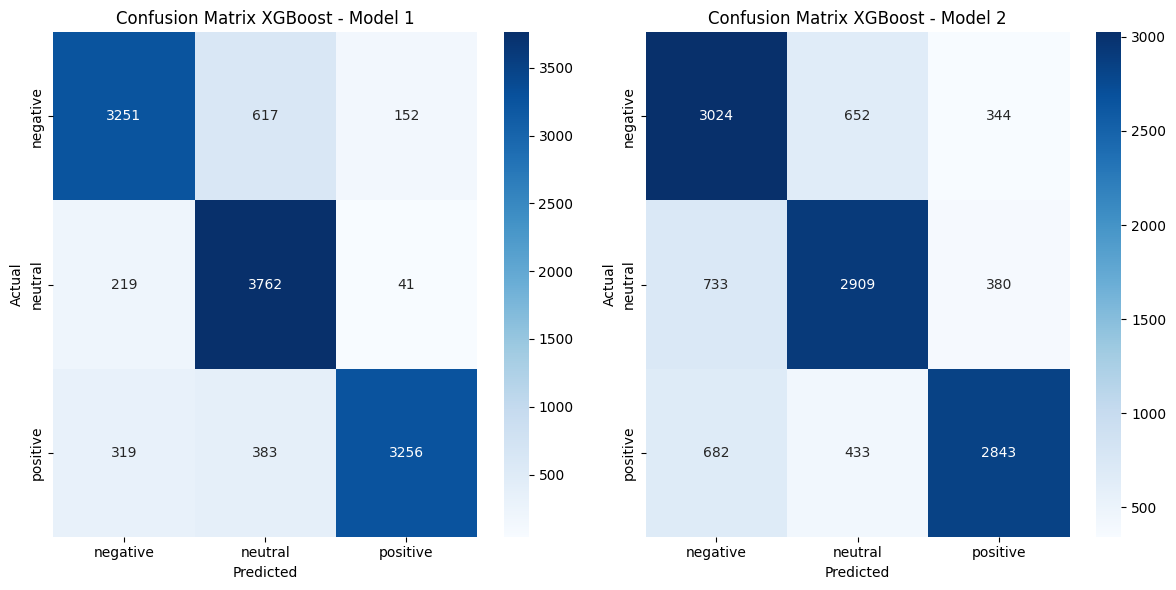

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm_model1_xgb = confusion_matrix(y_test_combinedData, y_pred_xgb_combinedData_tfidf)
cm_model2_xgb = confusion_matrix(y_test_combinedData, y_pred_xgb_combinedData_word2vec)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_model1_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix XGBoost - Model 1')

plt.subplot(1, 2, 2)
sns.heatmap(cm_model2_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix XGBoost - Model 2')

plt.tight_layout()
plt.show()

In [33]:
print('Parameters for LogReg with TF-IDF:')
Model1_logreg_vader_combinedData = LogisticRegression(solver = 'saga', penalty = 'l2', max_iter = 300, C = 10)
Model1_logreg_vader_combinedData.fit(X_train_tfidf, y_train_combinedData)

Parameters for LogReg with TF-IDF:


LogisticRegression(C=10, max_iter=300, solver='saga')

In [34]:
print('Parameters for LogReg with Word2Vec:')
Model2_logreg_vader_combinedData = LogisticRegression(solver = 'saga', penalty = 'none', max_iter = 300, C = 10)
Model2_logreg_vader_combinedData.fit(X_train_word2vec, y_train_combinedData)

Parameters for LogReg with Word2Vec:


C:\Users\anish\anaconda3\envs\gputest\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\anish\anaconda3\envs\gputest\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


LogisticRegression(C=10, max_iter=300, penalty='none', solver='saga')

In [35]:
y_pred_logreg_combinedData_tfidf = Model1_logreg_vader_combinedData.predict(X_test_tfidf)
accuracy_logreg_tfidf = accuracy_score(y_test_combinedData, y_pred_logreg_combinedData_tfidf)

In [36]:
y_pred_logreg_combinedData_word2vec = Model2_logreg_vader_combinedData.predict(X_test_word2vec)
accuracy_logreg_word2vec = accuracy_score(y_test_combinedData, y_pred_logreg_combinedData_word2vec)

In [37]:
print(f'Accuracy for LogReg using TF-IDF in combined app data: {accuracy_logreg_tfidf*100}')
print(f'Accuracy for LogReg using Word2Vec in combined app data: {accuracy_logreg_word2vec*100}')

Accuracy for LogReg using TF-IDF in combined app data: 89.08333333333334
Accuracy for LogReg using Word2Vec in combined app data: 60.96666666666667


In [38]:
print("Classification Report for LogReg using TF-IDF:")
print(classification_report(y_test_combinedData, y_pred_logreg_combinedData_tfidf, target_names=label_encoder.classes_))
print("Classification Report for LogReg using Word2Vec:")
print(classification_report(y_test_combinedData, y_pred_logreg_combinedData_word2vec, target_names=label_encoder.classes_))

Classification Report for LogReg using TF-IDF:
              precision    recall  f1-score   support

    negative       0.87      0.87      0.87      4020
     neutral       0.88      0.92      0.90      4022
    positive       0.93      0.88      0.91      3958

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000

Classification Report for LogReg using Word2Vec:
              precision    recall  f1-score   support

    negative       0.58      0.64      0.61      4020
     neutral       0.54      0.53      0.53      4022
    positive       0.72      0.67      0.69      3958

    accuracy                           0.61     12000
   macro avg       0.61      0.61      0.61     12000
weighted avg       0.61      0.61      0.61     12000



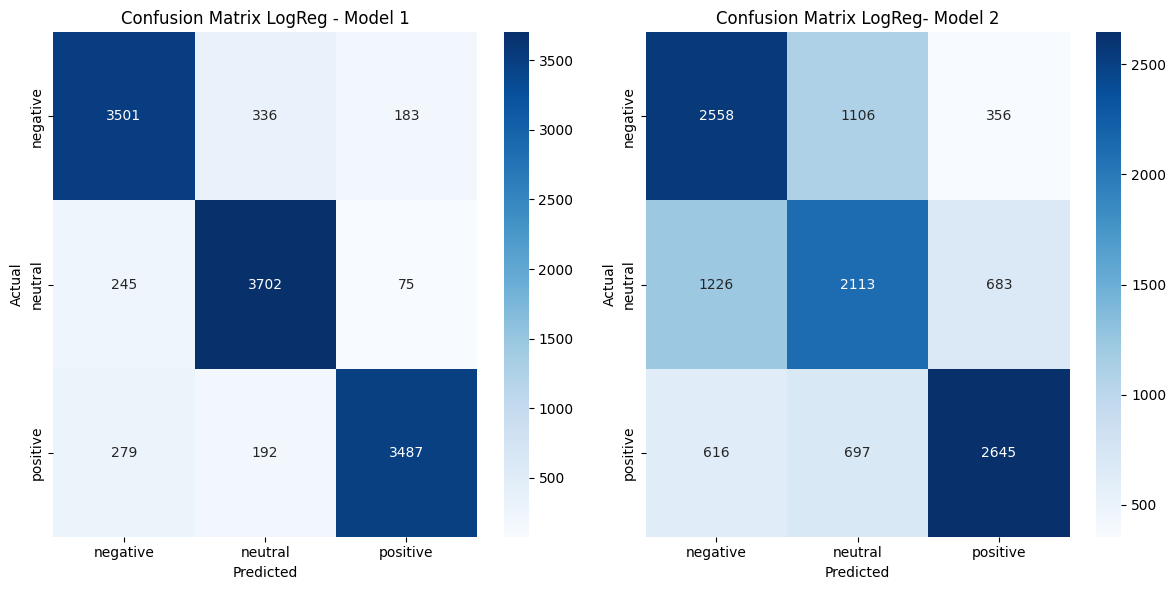

In [39]:
cm_model1_logreg = confusion_matrix(y_test_combinedData, y_pred_logreg_combinedData_tfidf)
cm_model2_logreg = confusion_matrix(y_test_combinedData, y_pred_logreg_combinedData_word2vec)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_model1_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix LogReg - Model 1')

plt.subplot(1, 2, 2)
sns.heatmap(cm_model2_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix LogReg- Model 2')

plt.tight_layout()
plt.show()

In [40]:
from sklearn.naive_bayes import MultinomialNB
print('Parameters for NaiveBayes with TF-IDF:')
Model1_nb_vader_combinedData = MultinomialNB(fit_prior= False, alpha = 1.0)
Model1_nb_vader_combinedData.fit(X_train_tfidf, y_train_combinedData)

Parameters for NaiveBayes with TF-IDF:


MultinomialNB(fit_prior=False)

In [41]:
print('Parameters for NaiveBayes with Word2Vec:')
Model2_nb_vader_combinedData = GaussianNB(var_smoothing = 1e-11)
Model2_nb_vader_combinedData.fit(X_train_word2vec, y_train_combinedData)

Parameters for NaiveBayes with Word2Vec:


GaussianNB(var_smoothing=1e-11)

In [42]:
y_pred_nb_combinedData_tfidf = Model1_nb_vader_combinedData.predict(X_test_tfidf)
accuracy_nb_tfidf = accuracy_score(y_test_combinedData, y_pred_nb_combinedData_tfidf)

y_pred_nb_combinedData_word2vec = Model2_nb_vader_combinedData.predict(X_test_word2vec)
accuracy_nb_word2vec = accuracy_score(y_test_combinedData, y_pred_nb_combinedData_word2vec)

In [43]:
print(f'Accuracy for NB using TF-IDF in combined app data: {accuracy_nb_tfidf*100}')
print(f'Accuracy for NB using Word2Vec in combined app data: {accuracy_nb_word2vec*100}')

Accuracy for NB using TF-IDF in combined app data: 75.3
Accuracy for NB using Word2Vec in combined app data: 56.75


In [44]:
print("Classification Report for NB using TF-IDF:")
print(classification_report(y_test_combinedData, y_pred_nb_combinedData_tfidf, target_names=label_encoder.classes_))
print("Classification Report for NB using Word2Vec:")
print(classification_report(y_test_combinedData, y_pred_nb_combinedData_word2vec, target_names=label_encoder.classes_))

Classification Report for NB using TF-IDF:
              precision    recall  f1-score   support

    negative       0.68      0.88      0.77      4020
     neutral       0.86      0.54      0.66      4022
    positive       0.77      0.84      0.80      3958

    accuracy                           0.75     12000
   macro avg       0.77      0.75      0.75     12000
weighted avg       0.77      0.75      0.75     12000

Classification Report for NB using Word2Vec:
              precision    recall  f1-score   support

    negative       0.52      0.79      0.63      4020
     neutral       0.59      0.55      0.57      4022
    positive       0.66      0.36      0.46      3958

    accuracy                           0.57     12000
   macro avg       0.59      0.57      0.55     12000
weighted avg       0.59      0.57      0.55     12000



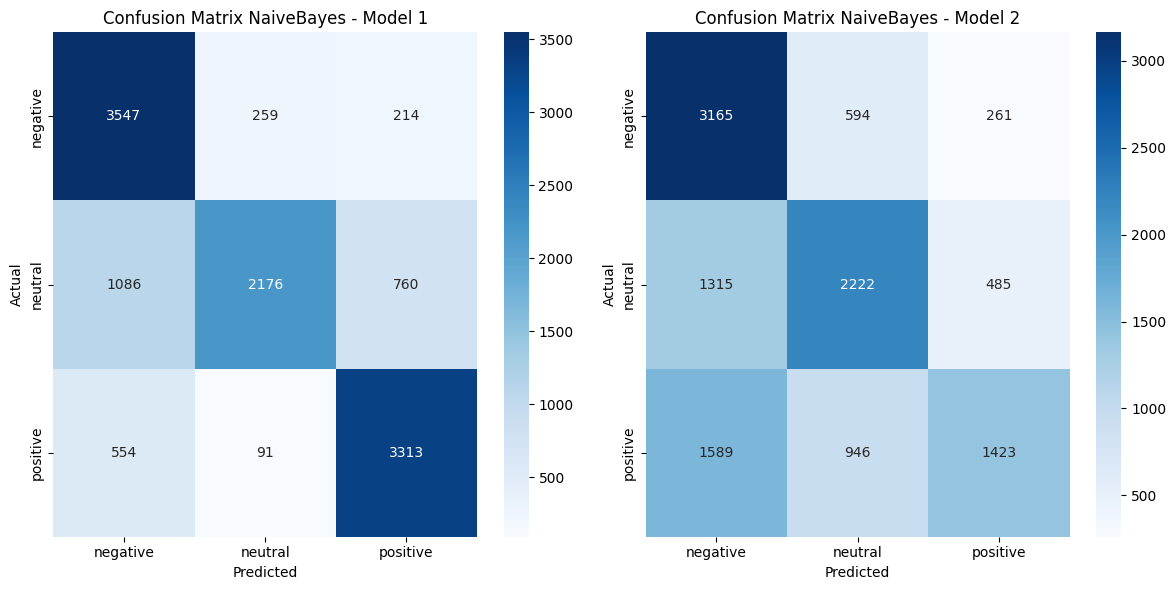

In [45]:
cm_model1_nb = confusion_matrix(y_test_combinedData, y_pred_nb_combinedData_tfidf)
cm_model2_nb = confusion_matrix(y_test_combinedData, y_pred_nb_combinedData_word2vec)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_model1_nb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix NaiveBayes - Model 1')

plt.subplot(1, 2, 2)
sns.heatmap(cm_model2_nb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix NaiveBayes - Model 2')

plt.tight_layout()
plt.show()

In [46]:
print('Parameters for RF with TF-IDF:')
Model1_rf_vader_combinedData = RandomForestClassifier(n_estimators = 57, min_samples_split = 15, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 20)
Model1_rf_vader_combinedData.fit(X_train_tfidf, y_train_combinedData)

Parameters for RF with TF-IDF:


RandomForestClassifier(max_depth=20, min_samples_split=15, n_estimators=57)

In [47]:
print('Parameters for RF with Word2Vec:')
Model2_rf_vader_combinedData = RandomForestClassifier(n_estimators = 71, min_samples_split = 2, min_samples_leaf = 2, max_features = 'log2', max_depth = 20)
Model2_rf_vader_combinedData.fit(X_train_word2vec, y_train_combinedData)

Parameters for RF with Word2Vec:


RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=2,
                       n_estimators=71)

In [48]:
y_pred_rf_combinedData_tfidf = Model1_rf_vader_combinedData.predict(X_test_tfidf)
accuracy_rf_tfidf = accuracy_score(y_test_combinedData, y_pred_rf_combinedData_tfidf)

y_pred_rf_combinedData_word2vec = Model2_rf_vader_combinedData.predict(X_test_word2vec)
accuracy_rf_word2vec = accuracy_score(y_test_combinedData, y_pred_rf_combinedData_word2vec)

In [49]:
print(f'Accuracy for RF using TF-IDF in combined app data: {accuracy_rf_tfidf*100}')
print(f'Accuracy for RF using Word2Vec in combined app data: {accuracy_rf_word2vec*100}')

Accuracy for RF using TF-IDF in combined app data: 78.36666666666666
Accuracy for RF using Word2Vec in combined app data: 69.56666666666666


In [50]:
print("Classification Report for RF using TF-IDF:")
print(classification_report(y_test_combinedData, y_pred_rf_combinedData_tfidf, target_names=label_encoder.classes_))
print("Classification Report for RF using Word2Vec:")
print(classification_report(y_test_combinedData, y_pred_rf_combinedData_word2vec, target_names=label_encoder.classes_))

Classification Report for RF using TF-IDF:
              precision    recall  f1-score   support

    negative       0.77      0.72      0.75      4020
     neutral       0.71      0.87      0.78      4022
    positive       0.92      0.75      0.83      3958

    accuracy                           0.78     12000
   macro avg       0.80      0.78      0.78     12000
weighted avg       0.80      0.78      0.78     12000

Classification Report for RF using Word2Vec:
              precision    recall  f1-score   support

    negative       0.65      0.72      0.68      4020
     neutral       0.68      0.72      0.70      4022
    positive       0.78      0.64      0.70      3958

    accuracy                           0.70     12000
   macro avg       0.70      0.70      0.70     12000
weighted avg       0.70      0.70      0.70     12000



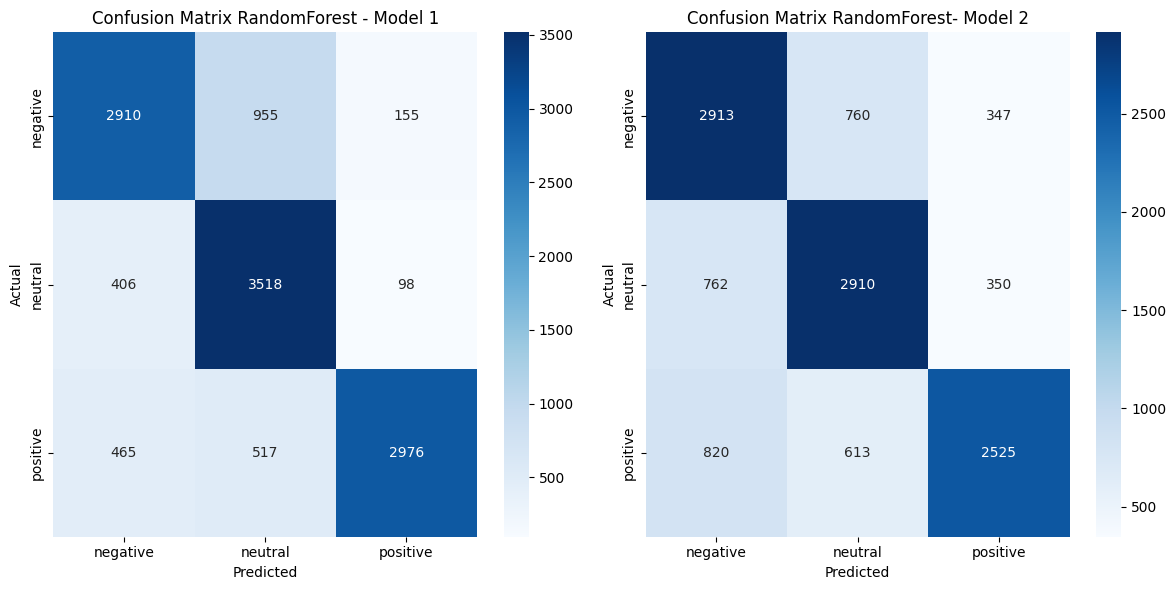

In [51]:
cm_model1_rf = confusion_matrix(y_test_combinedData, y_pred_rf_combinedData_tfidf)
cm_model2_rf = confusion_matrix(y_test_combinedData, y_pred_rf_combinedData_word2vec)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_model1_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix RandomForest - Model 1')

plt.subplot(1, 2, 2)
sns.heatmap(cm_model2_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix RandomForest- Model 2')

plt.tight_layout()
plt.show()

In [52]:
print('Parameters for SVC with TF-IDF:')
Model1_svc_vader_combinedData = SVC(kernel = 'linear', degree = 2, C = 1)
Model1_svc_vader_combinedData.fit(X_train_tfidf, y_train_combinedData)

Parameters for SVC with TF-IDF:


SVC(C=1, degree=2, kernel='linear')

In [55]:
print('Parameters for SVC with Word2Vec:')
Model2_svc_vader_combinedData = SVC(kernel = 'rbf', degree = 1, C = 1)
Model2_svc_vader_combinedData.fit(X_train_word2vec, y_train_combinedData)

Parameters for SVC with Word2Vec:


SVC(C=1, degree=1)

In [56]:
y_pred_svc_combinedData_tfidf = Model1_svc_vader_combinedData.predict(X_test_tfidf)
accuracy_svc_tfidf = accuracy_score(y_test_combinedData, y_pred_svc_combinedData_tfidf)

y_pred_svc_combinedData_word2vec = Model2_svc_vader_combinedData.predict(X_test_word2vec)
accuracy_svc_word2vec = accuracy_score(y_test_combinedData, y_pred_svc_combinedData_word2vec)

In [57]:
print(f'Accuracy for SVC using TF-IDF in combined app data: {accuracy_svc_tfidf*100}')
print(f'Accuracy for SVC using Word2Vec in combined app data: {accuracy_svc_word2vec*100}')

Accuracy for SVC using TF-IDF in combined app data: 90.525
Accuracy for SVC using Word2Vec in combined app data: 78.51666666666667


In [58]:
print("Classification Report for SVC using TF-IDF:")
print(classification_report(y_test_combinedData, y_pred_svc_combinedData_tfidf, target_names=label_encoder.classes_))
print("Classification Report for SVC using Word2Vec:")
print(classification_report(y_test_combinedData, y_pred_svc_combinedData_word2vec, target_names=label_encoder.classes_))

Classification Report for SVC using TF-IDF:
              precision    recall  f1-score   support

    negative       0.86      0.91      0.88      4020
     neutral       0.91      0.93      0.92      4022
    positive       0.95      0.88      0.91      3958

    accuracy                           0.91     12000
   macro avg       0.91      0.91      0.91     12000
weighted avg       0.91      0.91      0.91     12000

Classification Report for SVC using Word2Vec:
              precision    recall  f1-score   support

    negative       0.69      0.84      0.76      4020
     neutral       0.81      0.77      0.79      4022
    positive       0.89      0.75      0.81      3958

    accuracy                           0.79     12000
   macro avg       0.80      0.78      0.79     12000
weighted avg       0.80      0.79      0.79     12000



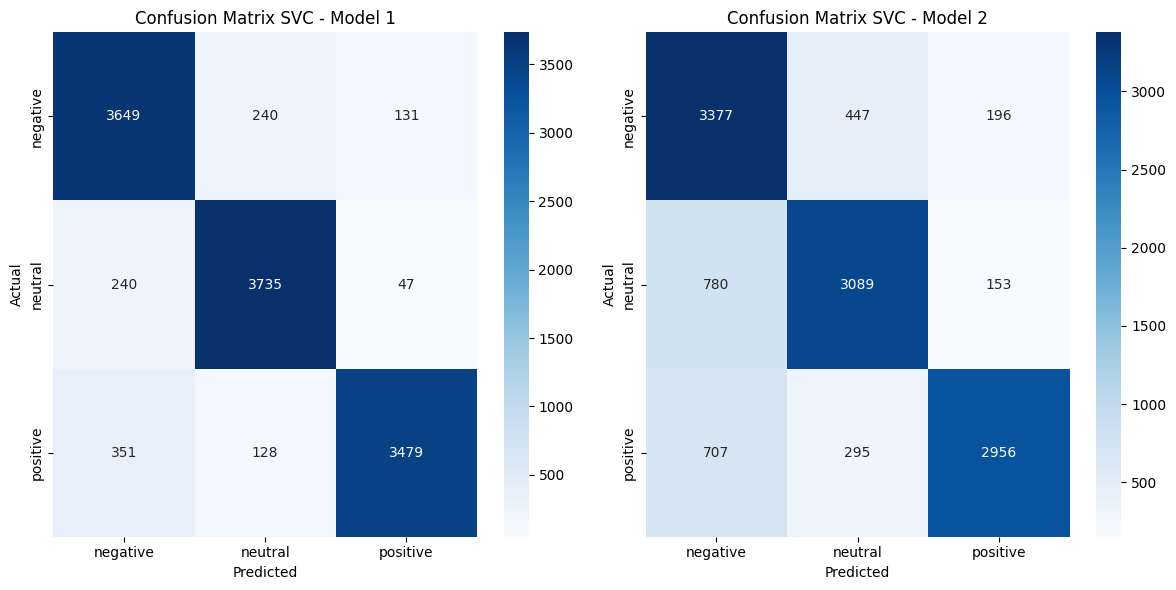

In [59]:
cm_model1_svc = confusion_matrix(y_test_combinedData, y_pred_svc_combinedData_tfidf)
cm_model2_svc = confusion_matrix(y_test_combinedData, y_pred_svc_combinedData_word2vec)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_model1_svc, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVC - Model 1')

plt.subplot(1, 2, 2)
sns.heatmap(cm_model2_svc, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVC - Model 2')

plt.tight_layout()
plt.show()

In [60]:
from IPython.display import display
data_CApp = {
    "Model": ["XGBoost", "Logistic Regression", "Random Forest", "Naive Bayes", "Support Vector Machines"],
    "TF-IDF Accuracy (%)": [accuracy_xgb_tfidf*100, accuracy_logreg_tfidf*100, accuracy_rf_tfidf*100, accuracy_nb_tfidf*100, accuracy_svc_tfidf*100],
    "Word2Vec Accuracy (%)": [accuracy_xgb_word2vec*100, accuracy_logreg_word2vec*100, accuracy_rf_word2vec*100, accuracy_nb_word2vec*100, accuracy_svc_word2vec*100]
}

df_CApp = pd.DataFrame(data_CApp)

print('Accuracy using diff ML and word-embedding models in Combined App Data:')
display(df_CApp)

Accuracy using diff ML and word-embedding models in Combined App Data:


,Model,TF-IDF Accuracy (%),Word2Vec Accuracy (%)
0,XGBoost,85.575000,73.133333
1,Logistic Regression,89.083333,60.966667
2,Random Forest,78.366667,69.566667
3,Naive Bayes,75.300000,56.750000
4,Support Vector Machines,90.525000,78.516667


In [61]:
model_tfidf = [Model1_xgb_vader_combinedData, Model1_logreg_vader_combinedData, Model1_rf_vader_combinedData, Model1_nb_vader_combinedData, Model1_svc_vader_combinedData]
model_w2v = [Model2_xgb_vader_combinedData, Model2_logreg_vader_combinedData, Model2_rf_vader_combinedData, Model2_nb_vader_combinedData, Model2_svc_vader_combinedData]

Save models to disk

In [62]:
import pickle
model_names_tfidf = ['Model1_xgb_vader_combinedData.pkl', 'Model1_logreg_vader_combinedData.pkl', 'Model1_rf_vader_combinedData.pkl', 'Model1_nb_vader_combinedData.pkl', 'Model1_svc_vader_combinedData.pkl']
for model, name in zip(model_tfidf, model_names_tfidf):
    with open(name, 'wb') as file:
        pickle.dump(model, file)

In [63]:
model_names_w2v = ['Model2_xgb_vader_combinedData', 'Model2_logreg_vader_combinedData.pkl', 'Model2_rf_vader_combinedData.pkl', 'Model2_nb_vader_combinedData.pkl', 'Model2_svc_vader_combinedData.pkl']
for model, name in zip(model_w2v, model_names_w2v):
    with open(name, 'wb') as file:
        pickle.dump(model, file)

Load models from disk

In [64]:
from joblib import dump, load
loaded_models_tfidf = []
for name in model_names_tfidf:
    loaded_models_tfidf.append(load(name))
loaded_models_tfidf  

[XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.8, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=2, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=4, max_leaves=None,
               min_child_weight=1, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='multi:softprob', ...),
 LogisticRegression(C=10, max_iter=300, solver='saga'),
 RandomForestClassifier(max_depth=20, min_samples_split=15, n_estimators=57),
 MultinomialNB(fit_prior=False),
 SVC(C=1, degree=2, kernel='linear')]

In [65]:
from joblib import dump, load
loaded_models_w2v = []
for name in model_names_w2v:
    loaded_models_w2v.append(load(name))
loaded_models_w2v  

[XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
               device=None, early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=0.5, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
               max_leaves=None, min_child_weight=5, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=None,
               n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...),
 LogisticRegression(C=10, max_iter=300, penalty='none', solver='saga'),
 RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=2,
                        n_estimators=71),
 GaussianNB(var_smoothing=1e-11),
 SVC(C=1, degree=1)

seperating apps and Removing matching data from earlier trained data, so that all data are fresh for prediction

In [66]:
from IPython.display import display

separated_app_data = ['app1_data1_separated', 'app2_data1_separated'] # Name accordingly for more apps 
review_data_sources = ['ReviewData1', 'ReviewData2']  # List of corresponding review data sources

separated_data = {}
unique_separated_data = {}

for app, review_source in zip(separated_app_data, review_data_sources):
    separated_data[app] = combined_app_data_vader[combined_app_data_vader['source'] == review_source].drop(columns=['source'])
    
    # Exclude matching data using a merge with indicator
    merged_data = separated_data[app].merge(balanced_data_CA_vader, how='left', indicator=True)
    unique_separated_data[app] = merged_data[merged_data['_merge'] == 'left_only'].drop(columns=['_merge', 'source'])
    
    print(f'{app} DataFrame\n\n')
    unique_separated_data[app].reset_index(drop=True, inplace=True)
    display(unique_separated_data[app])
    print('\n\n')


app1_data1_separated DataFrame




,ID,CleanText,rating,sentiment_vader,num_characters,num_words,num_sentences,sentiment_encoded
0,3,great easy navigate use super easy,5,positive,34,6,1,2
1,5,easy use great rates love meeting host super f...,5,positive,76,13,1,2
2,7,host unavailable due overseas wait hour enter ...,1,positive,314,40,1,2
3,8,good easy reference customers dont reply,4,positive,40,6,1,2
4,9,dumpster fire,1,negative,13,2,1,0
...,...,...,...,...,...,...,...,...
76853,147595,love work actually useful travelers look cheap...,5,positive,58,9,1,2
76854,147596,please add search filters pets allow,2,positive,36,6,1,2
76855,147598,since last time update featured collection cat...,3,negative,148,24,1,0
76856,147599,useful ive use quickly compose messages hosts ...,4,positive,72,10,1,2





app2_data1_separated DataFrame




,ID,CleanText,rating,sentiment_vader,num_characters,num_words,num_sentences,sentiment_encoded
0,1,customer support available though marked websi...,1,positive,282,43,1,2
1,2,trust issues sell fake hotel,1,positive,28,5,1,2
2,4,slow,3,neutral,4,1,1,1
3,5,bad hard talk customer service request refund ...,1,negative,69,11,1,0
4,7,ok whatever,2,positive,11,2,1,2
...,...,...,...,...,...,...,...,...
40237,84689,try type venice search function crashes immedi...,1,negative,56,8,1,0
40238,84692,clean room many facilities u ask towel soap mi...,5,positive,327,55,1,2
40239,84693,good guide travels asia good choice hotels pic...,2,positive,242,38,1,2
40240,84694,useful times use,4,positive,16,3,1,2


In [67]:
App1_sampled_data = unique_separated_data['app1_data1_separated'].sample(frac=0.2, random_state=42)
App2_sampled_data = unique_separated_data['app2_data1_separated'].sample(frac=0.2, random_state=42)

In [68]:
print("App1_sampled_data shape:", App1_sampled_data.shape)
print("App2_sampled_data shape:", App2_sampled_data.shape)

App1_sampled_data shape: (15372, 8)
App2_sampled_data shape: (8048, 8)


Transform App data using TF-IDF

In [72]:
App1_data_vader_tfidf = tfidf_vectorizer_vader.transform(App1_sampled_data['CleanText'])
App2_data_vader_tfidf = tfidf_vectorizer_vader.transform(App2_sampled_data['CleanText'])

Tokenize App data

In [73]:
App1_data_tokens = tokenize_text(App1_sampled_data['CleanText'])
App2_data_tokens = tokenize_text(App2_sampled_data['CleanText'])

Transform App data using Word2Vec

In [74]:
App1_data_vader_W2V = np.array([average_word_vectors(tokens, word2vec_model_vader.wv, vocabulary_combinedData, word2vec_model_vader.vector_size) for tokens in App1_data_tokens])
App2_data_vader_W2V = np.array([average_word_vectors(tokens, word2vec_model_vader.wv, vocabulary_combinedData, word2vec_model_vader.vector_size) for tokens in App2_data_tokens])

Function to predict sentiments and store them

In [103]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
def predict_and_print_tfidf(models, data_tfidf, app_name, y_actual_tfidf):
    predictions_tfidf = []
    model1 = []
    
    for model, name in zip(models, model_names_tfidf):
        predicted_sentiment1 = model.predict(data_tfidf)
        accuracy1 = accuracy_score(y_actual_tfidf, predicted_sentiment1)*100
        precision1 = precision_score(y_actual_tfidf, predicted_sentiment1, average='weighted')
        model1.append((name, accuracy1, precision1))
        predictions_tfidf.append((name, predicted_sentiment1))
        print(f'Predicted sentiment for {app_name} using {name} (TF-IDF): {predicted_sentiment1}')
        print(f'Accuracy for {app_name} using {name} (TF-IDF): {accuracy1}')
        print(f'Precision for {app_name} using {name} (TF-IDF): {precision1}')
        print('\n')
    
    return model1

In [105]:
def predict_and_print_w2v(models, data_w2v, app_name, y_actual_w2v):
    predictions_w2v = []
    model2 = []
    
    for model, name in zip(models, model_names_w2v):
        predicted_sentiment2 = model.predict(data_w2v)
        accuracy2 = accuracy_score(y_actual_w2v, predicted_sentiment2)*100
        precision2 = precision_score(y_actual_w2v, predicted_sentiment2, average='weighted')
        model2.append((name, accuracy2, precision2))
        predictions_w2v.append((name, predicted_sentiment2, ))
        print(f'Predicted sentiment for {app_name} using {name} (Word2Vec): {predicted_sentiment2}')
        print(f'Accuracy for {app_name} using {name} (Word2Vec): {accuracy2}')
        print(f'Precision for {app_name} using {name} (TF-IDF): {precision2}')
        print('\n')
    
    return model2

Predict and store results for App1

In [99]:
model1_app1 = predict_and_print_tfidf(loaded_models_tfidf, App1_data_vader_tfidf, 'App1', App1_sampled_data['sentiment_encoded'])

Predicted sentiment for App1 using Model1_xgb_vader_combinedData.pkl (TF-IDF): [2 1 2 ... 0 2 2]
Accuracy for App1 using Model1_xgb_vader_combinedData.pkl (TF-IDF): 82.35102784283113
Precision for App1 using Model1_xgb_vader_combinedData.pkl (TF-IDF): 0.9204748612084636


Predicted sentiment for App1 using Model1_logreg_vader_combinedData.pkl (TF-IDF): [2 2 2 ... 0 2 2]
Accuracy for App1 using Model1_logreg_vader_combinedData.pkl (TF-IDF): 88.81082487639864
Precision for App1 using Model1_logreg_vader_combinedData.pkl (TF-IDF): 0.9313665754800878


Predicted sentiment for App1 using Model1_rf_vader_combinedData.pkl (TF-IDF): [2 1 2 ... 1 0 2]
Accuracy for App1 using Model1_rf_vader_combinedData.pkl (TF-IDF): 75.11059068436118
Precision for App1 using Model1_rf_vader_combinedData.pkl (TF-IDF): 0.9027922431997912


Predicted sentiment for App1 using Model1_nb_vader_combinedData.pkl (TF-IDF): [2 0 2 ... 0 0 2]
Accuracy for App1 using Model1_nb_vader_combinedData.pkl (TF-IDF): 83.463440020

Predict and store results for App2

In [102]:
model1_app2 = predict_and_print_tfidf(loaded_models_tfidf, App2_data_vader_tfidf, 'App2', App2_sampled_data['sentiment_encoded'])

Predicted sentiment for App2 using Model1_xgb_vader_combinedData.pkl (TF-IDF): [2 2 2 ... 2 2 2]
Accuracy for App2 using Model1_xgb_vader_combinedData.pkl (TF-IDF): 83.00198807157058
Precision for App2 using Model1_xgb_vader_combinedData.pkl (TF-IDF): 0.9134369251133695


Predicted sentiment for App2 using Model1_logreg_vader_combinedData.pkl (TF-IDF): [2 2 0 ... 2 2 2]
Accuracy for App2 using Model1_logreg_vader_combinedData.pkl (TF-IDF): 89.74900596421472
Precision for App2 using Model1_logreg_vader_combinedData.pkl (TF-IDF): 0.9309750032841043


Predicted sentiment for App2 using Model1_rf_vader_combinedData.pkl (TF-IDF): [1 2 2 ... 2 0 2]
Accuracy for App2 using Model1_rf_vader_combinedData.pkl (TF-IDF): 76.5034791252485
Precision for App2 using Model1_rf_vader_combinedData.pkl (TF-IDF): 0.8979894790918033


Predicted sentiment for App2 using Model1_nb_vader_combinedData.pkl (TF-IDF): [0 2 2 ... 2 2 2]
Accuracy for App2 using Model1_nb_vader_combinedData.pkl (TF-IDF): 83.4493041749

In [106]:
model2_app1 = predict_and_print_w2v(loaded_models_w2v, App1_data_vader_W2V, 'App1', App1_sampled_data['sentiment_encoded'])

Predicted sentiment for App1 using Model2_xgb_vader_combinedData (Word2Vec): [2 0 2 ... 0 0 2]
Accuracy for App1 using Model2_xgb_vader_combinedData (Word2Vec): 71.86442883164194
Precision for App1 using Model2_xgb_vader_combinedData (TF-IDF): 0.884974309073975


Predicted sentiment for App1 using Model2_logreg_vader_combinedData.pkl (Word2Vec): [2 0 2 ... 0 0 2]
Accuracy for App1 using Model2_logreg_vader_combinedData.pkl (Word2Vec): 66.42596929482175
Precision for App1 using Model2_logreg_vader_combinedData.pkl (TF-IDF): 0.8738873211687584


Predicted sentiment for App1 using Model2_rf_vader_combinedData.pkl (Word2Vec): [2 1 2 ... 0 0 2]
Accuracy for App1 using Model2_rf_vader_combinedData.pkl (Word2Vec): 64.35076762945616
Precision for App1 using Model2_rf_vader_combinedData.pkl (TF-IDF): 0.8762997566489227


Predicted sentiment for App1 using Model2_nb_vader_combinedData.pkl (Word2Vec): [0 1 2 ... 0 0 2]
Accuracy for App1 using Model2_nb_vader_combinedData.pkl (Word2Vec): 40.671350

In [107]:
model2_app2 = predict_and_print_w2v(loaded_models_w2v, App2_data_vader_W2V, 'App2', App2_sampled_data['sentiment_encoded'])

Predicted sentiment for App2 using Model2_xgb_vader_combinedData (Word2Vec): [1 2 2 ... 2 2 2]
Accuracy for App2 using Model2_xgb_vader_combinedData (Word2Vec): 74.49055666003976
Precision for App2 using Model2_xgb_vader_combinedData (TF-IDF): 0.8765943939277783


Predicted sentiment for App2 using Model2_logreg_vader_combinedData.pkl (Word2Vec): [1 2 2 ... 2 2 2]
Accuracy for App2 using Model2_logreg_vader_combinedData.pkl (Word2Vec): 69.37127236580517
Precision for App2 using Model2_logreg_vader_combinedData.pkl (TF-IDF): 0.8562910935139012


Predicted sentiment for App2 using Model2_rf_vader_combinedData.pkl (Word2Vec): [1 2 2 ... 2 0 2]
Accuracy for App2 using Model2_rf_vader_combinedData.pkl (Word2Vec): 68.4145129224652
Precision for App2 using Model2_rf_vader_combinedData.pkl (TF-IDF): 0.8682398483212709


Predicted sentiment for App2 using Model2_nb_vader_combinedData.pkl (Word2Vec): [1 2 0 ... 2 0 2]
Accuracy for App2 using Model2_nb_vader_combinedData.pkl (Word2Vec): 44.843439

Create DataFrame for app, model, and accuracy

In [101]:
df_tfidf_app1 = pd.DataFrame(model1_app1, columns=['Model', 'Accuracy', 'Precision']).sort_values(by='Precision', ascending=False)
print('Accuracy and Precision in App1 with different models using TF-IDF')
display(df_tfidf_app1)

Accuracy and Precision in App1 with different models using TF-IDF


,Model,Accuracy,Precision
4,Model1_svc_vader_combinedData.pkl,89.123081,0.933129
1,Model1_logreg_vader_combinedData.pkl,88.810825,0.931367
0,Model1_xgb_vader_combinedData.pkl,82.351028,0.920475
3,Model1_nb_vader_combinedData.pkl,83.463440,0.904025
2,Model1_rf_vader_combinedData.pkl,75.110591,0.902792


In [109]:
df_tfidf_app2 = pd.DataFrame(model1_app2, columns=['Model', 'Accuracy', 'Precision']).sort_values(by='Precision', ascending=False)
print('Accuracy and Precision in App2 with different models using TF-IDF')
display(df_tfidf_app2)

Accuracy and Precision in App2 with different models using TF-IDF


,Model,Accuracy,Precision
1,Model1_logreg_vader_combinedData.pkl,89.749006,0.930975
4,Model1_svc_vader_combinedData.pkl,89.749006,0.930645
0,Model1_xgb_vader_combinedData.pkl,83.001988,0.913437
2,Model1_rf_vader_combinedData.pkl,76.503479,0.897989
3,Model1_nb_vader_combinedData.pkl,83.449304,0.892447


In [123]:
df_tfidf_app1['Apps'] = 'App1'
df_tfidf_app2['Apps'] = 'App2'
df_tfidf_app = pd.concat([df_tfidf_app1,df_tfidf_app2])

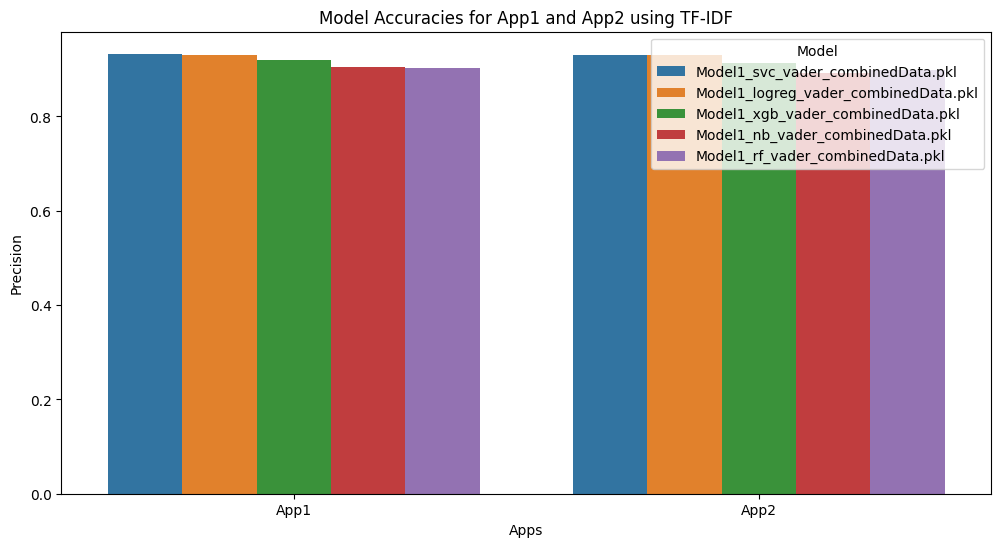

In [125]:
# Plot the precisions for each model
plt.figure(figsize=(12, 6))
sns.barplot(data=df_tfidf_app, x='Apps', y='Precision', hue='Model')
plt.title('Model Precisions for App1 and App2 using TF-IDF')
plt.xlabel('Apps')
plt.ylabel('Precision')
plt.legend(title='Model')
plt.show()

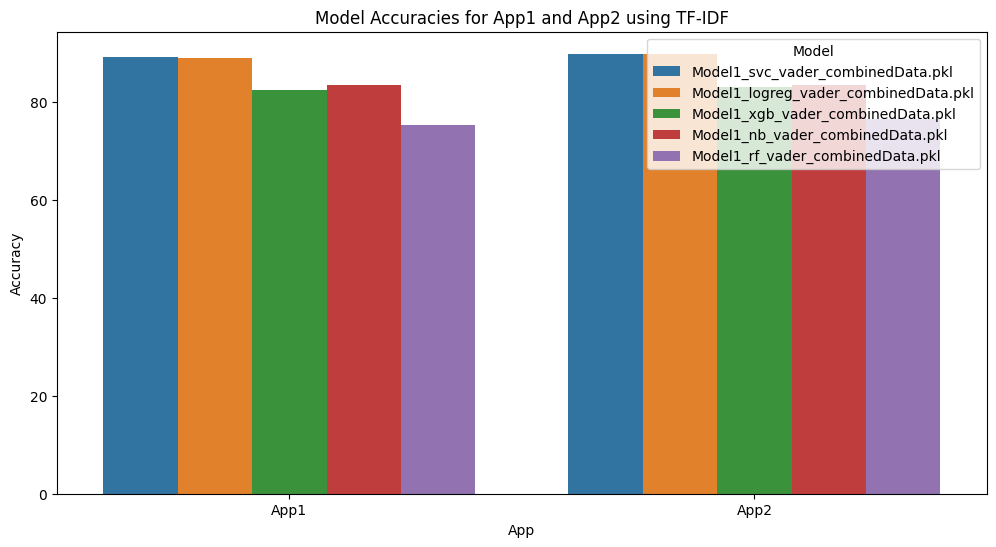

In [126]:
# Plot the accuracies for each model
plt.figure(figsize=(12, 6))
sns.barplot(data=df_tfidf_app, x='Apps', y='Accuracy', hue='Model')
plt.title('Model Accuracies for App1 and App2 using TF-IDF')
plt.xlabel('App')
plt.ylabel('Accuracy')
plt.legend(title='Model')
plt.show()

In [127]:
df_w2v_app1 = pd.DataFrame(model2_app1, columns=['Model', 'Accuracy', 'Precision']).sort_values(by='Precision', ascending=False)
print('Accuracy and Precision in App1 with different models using TF-IDF')
display(df_w2v_app1)

Accuracy and Precision in App1 with different models using TF-IDF


,Model,Accuracy,Precision
4,Model2_svc_vader_combinedData.pkl,75.052043,0.896363
0,Model2_xgb_vader_combinedData,71.864429,0.884974
2,Model2_rf_vader_combinedData.pkl,64.350768,0.876300
1,Model2_logreg_vader_combinedData.pkl,66.425969,0.873887
3,Model2_nb_vader_combinedData.pkl,40.671351,0.853722


In [128]:
df_w2v_app2 = pd.DataFrame(model2_app2, columns=['Model', 'Accuracy', 'Precision']).sort_values(by='Precision', ascending=False)
print('Accuracy and Precision in App2 with different models using TF-IDF')
display(df_w2v_app2)

Accuracy and Precision in App2 with different models using TF-IDF


,Model,Accuracy,Precision
4,Model2_svc_vader_combinedData.pkl,78.379722,0.891990
0,Model2_xgb_vader_combinedData,74.490557,0.876594
2,Model2_rf_vader_combinedData.pkl,68.414513,0.868240
1,Model2_logreg_vader_combinedData.pkl,69.371272,0.856291
3,Model2_nb_vader_combinedData.pkl,44.843439,0.832134


In [129]:
df_w2v_app1['Apps'] = 'App1'
df_w2v_app2['Apps'] = 'App2'
df_w2v_app = pd.concat([df_w2v_app1,df_w2v_app2])

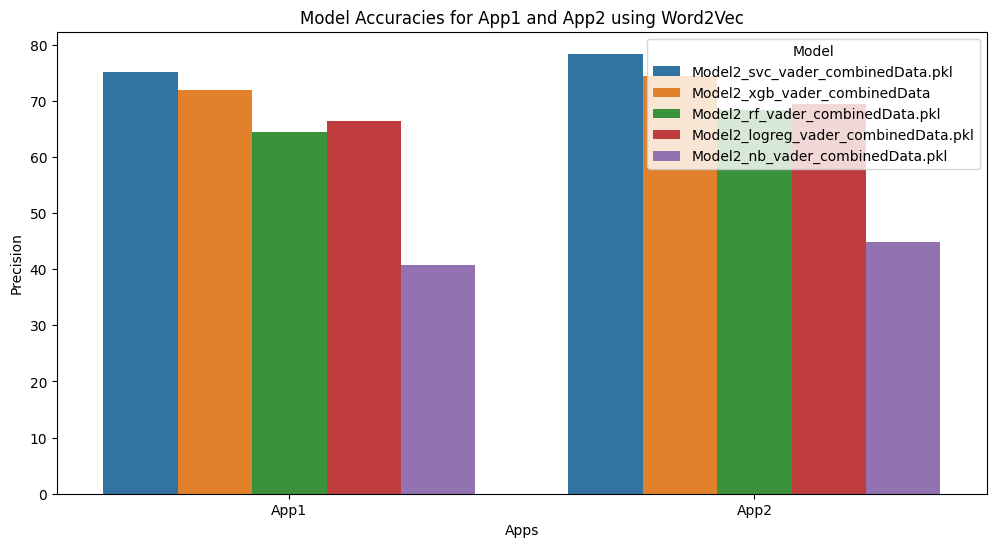

In [130]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_w2v_app, x='Apps', y='Accuracy', hue='Model')
plt.title('Model Accuracies for App1 and App2 using Word2Vec')
plt.xlabel('Apps')
plt.ylabel('Precision')
plt.legend(title='Model')
plt.show()

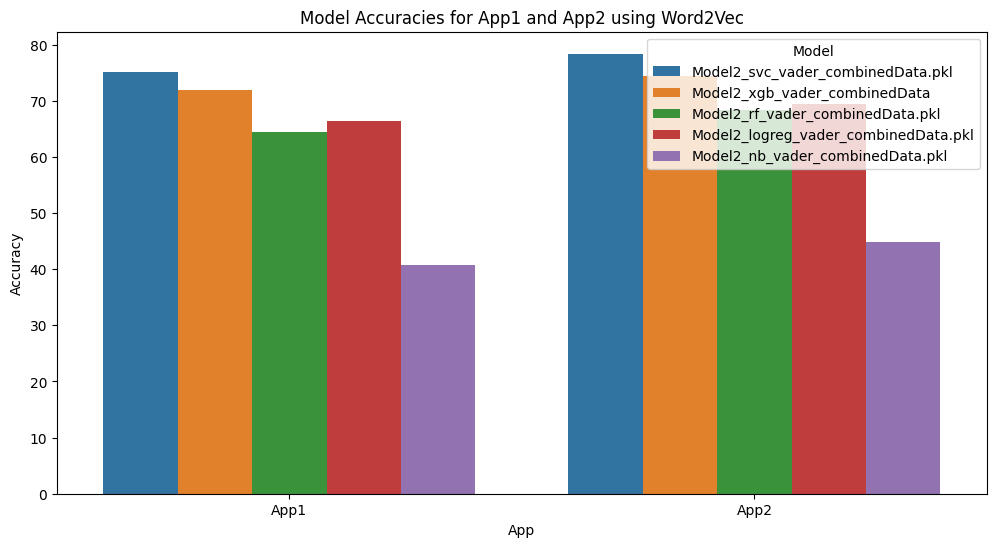

In [131]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_w2v_app, x='Apps', y='Accuracy', hue='Model')
plt.title('Model Accuracies for App1 and App2 using Word2Vec')
plt.xlabel('App')
plt.ylabel('Accuracy')
plt.legend(title='Model')
plt.show()

In [135]:
best_model_ML = Model1_logreg_vader_combinedData

In [134]:
combined_app_data_vader_tfidf = tfidf_vectorizer_vader.transform(combined_app_data_vader['CleanText'])
predicted_sentiment = best_model_ML.predict(combined_app_data_vader_tfidf)
y_actual = combined_app_data_vader['sentiment_encoded']
accuracy_combined_data = accuracy_score(y_actual, predicted_sentiment)*100
precision_combined_data = precision_score(y_actual, predicted_sentiment,  average='weighted')
print(f'Accuracy for combined_app_data: {accuracy_combined_data}')
print(f'Precision for combined_app_data: {precision_combined_data}')

Accuracy for combined_app_data: 90.85036702428006
Precision for combined_app_data: 0.9208123192357341


saving the best ML model

In [137]:
import joblib
joblib_filename = 'best_model_ML.pkl'
joblib.dump(best_model_ML, joblib_filename)

['best_model_ML.pkl']

loading the saved model 

In [138]:
loaded_model = joblib.load(joblib_filename)